In [1]:
from hmmlearn import hmm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import math
from sklearn.preprocessing import StandardScaler


In [2]:
stocks = ['AMZN', 'NVDA', 'AAPL']
stock_data = {}


# Fetch the stock data using yfinance
for stock in stocks:
    ticker = yf.Ticker(stock)
    df = ticker.history(start="2000-01-01")  # This defaults to the current date for the end parameter
    
    # Convert 'Date' index to a column (it's initially set as the index by default in yfinance)
    df.reset_index(inplace=True)
    
    # Convert 'Date' column to datetime type
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Resample the data to monthly frequency
    obs = df.resample('ME', on='Date').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last'})
    
    # Remove any rows with missing values or infinity
    obs = obs.replace([np.inf, -np.inf], np.nan).dropna()
    
    # Reset the index to ensure 'Date' remains a column
    obs = obs.reset_index()
    
    # Convert 'Date' back to date format
    obs['Date'] = obs['Date'].dt.date
    
    # Store in dictionary
    stock_data[stock] = obs


# # Display the data for each stock
# for stock, data in stock_data.items():
#     print(f"Data for {stock}:\n------------------------------------------------------------------------")
#     print(data.head())  # Show the first few rows of the data
    
#     # Print the first 162 months of the data
#     print(data)


Finding optimal HMM for AMZN
States: 2, AIC: 2433.361329078813, BIC: 2503.4138608492694, HQC: 2461.41211340817, CAIC: 2522.4138608492694
States: 3, AIC: 2362.9701042643724, BIC: 2480.9533156672464, HQC: 2410.2135305032893, CAIC: 2512.9533156672464
States: 4, AIC: 2268.1900982347533, BIC: 2441.477939982725, HQC: 2337.5788805231628, CAIC: 2488.477939982725
States: 5, AIC: 2251.541382243411, BIC: 2487.5078050491597, HQC: 2346.0282347212456, CAIC: 2551.5078050491597
States: 6, AIC: 2126.753122097546, BIC: 2432.772076673751, HQC: 2249.2907589047372, CAIC: 2515.772076673751


Model is not converging.  Current: -1013.8700781896682 is not greater than -1012.9050935136672. Delta is -0.964984676000995


States: 7, AIC: 2108.155780669823, BIC: 2491.601217729164, HQC: 2261.6969159463033, CAIC: 2595.601217729164
States: 8, AIC: 2215.549163498692, BIC: 2683.795033753849, HQC: 2403.0465113843948, CAIC: 2810.795033753849
States: 9, AIC: 2140.00977485531, BIC: 2700.430029018962, HQC: 2364.416049490166, CAIC: 2852.430029018962
States: 10, AIC: 2259.1743919984556, BIC: 2919.1429807832837, HQC: 2523.4423075223986, CAIC: 3098.1429807832837
Optimal number of hidden states for AMZN:
AIC: 7
BIC: 6
HQC: 6
CAIC: 4

Finding optimal HMM for NVDA
States: 2, AIC: 2404.8304886975684, BIC: 2474.883020468025, HQC: 2432.8812730269256, CAIC: 2493.883020468025
States: 3, AIC: 2279.595318408276, BIC: 2397.57852981115, HQC: 2326.838744647193, CAIC: 2429.57852981115
States: 4, AIC: 2231.3202075064264, BIC: 2404.608049254398, HQC: 2300.708989794836, CAIC: 2451.608049254398
States: 5, AIC: 2172.5351868478065, BIC: 2408.501609653555, HQC: 2267.022039325641, CAIC: 2472.501609653555
States: 6, AIC: 2040.8138090069174,

Model is not converging.  Current: -920.787081082322 is not greater than -918.4842118858245. Delta is -2.302869196497454


States: 7, AIC: 2170.000522118823, BIC: 2553.4459591781642, HQC: 2323.5416573953034, CAIC: 2657.4459591781642
States: 8, AIC: 2082.448669196654, BIC: 2550.6945394518116, HQC: 2269.946017082357, CAIC: 2677.6945394518116
States: 9, AIC: 2005.5985794418589, BIC: 2566.0188336055116, HQC: 2230.0048540767157, CAIC: 2718.0188336055116
States: 10, AIC: 2026.2407892001488, BIC: 2686.2093779849765, HQC: 2290.508704724092, CAIC: 2865.2093779849765
Optimal number of hidden states for NVDA:
AIC: 9
BIC: 6
HQC: 6
CAIC: 3

Finding optimal HMM for AAPL
States: 2, AIC: 2298.24197061188, BIC: 2368.2945023823363, HQC: 2326.292754941237, CAIC: 2387.2945023823363
States: 3, AIC: 2168.6262072984323, BIC: 2286.6094187013064, HQC: 2215.8696335373493, CAIC: 2318.6094187013064
States: 4, AIC: 2107.4781054238138, BIC: 2280.7659471717857, HQC: 2176.8668877122236, CAIC: 2327.7659471717857
States: 5, AIC: 1995.2455782137113, BIC: 2231.21200101946, HQC: 2089.7324306915457, CAIC: 2295.21200101946
States: 6, AIC: 2041.

Model is not converging.  Current: -773.9868312272797 is not greater than -752.6758730125131. Delta is -21.31095821476663


States: 9, AIC: 1900.967846428821, BIC: 2461.3881005924736, HQC: 2125.3741210636776, CAIC: 2613.3881005924736
States: 10, AIC: 1887.4039117549598, BIC: 2547.372500539788, HQC: 2151.671827278903, CAIC: 2726.3725005397873
Optimal number of hidden states for AAPL:
AIC: 10
BIC: 5
HQC: 7
CAIC: 5

Summary of Optimal Hidden States:
AMZN:
  AIC: 7
  BIC: 6
  HQC: 6
  CAIC: 4
NVDA:
  AIC: 9
  BIC: 6
  HQC: 6
  CAIC: 3
AAPL:
  AIC: 10
  BIC: 5
  HQC: 7
  CAIC: 5


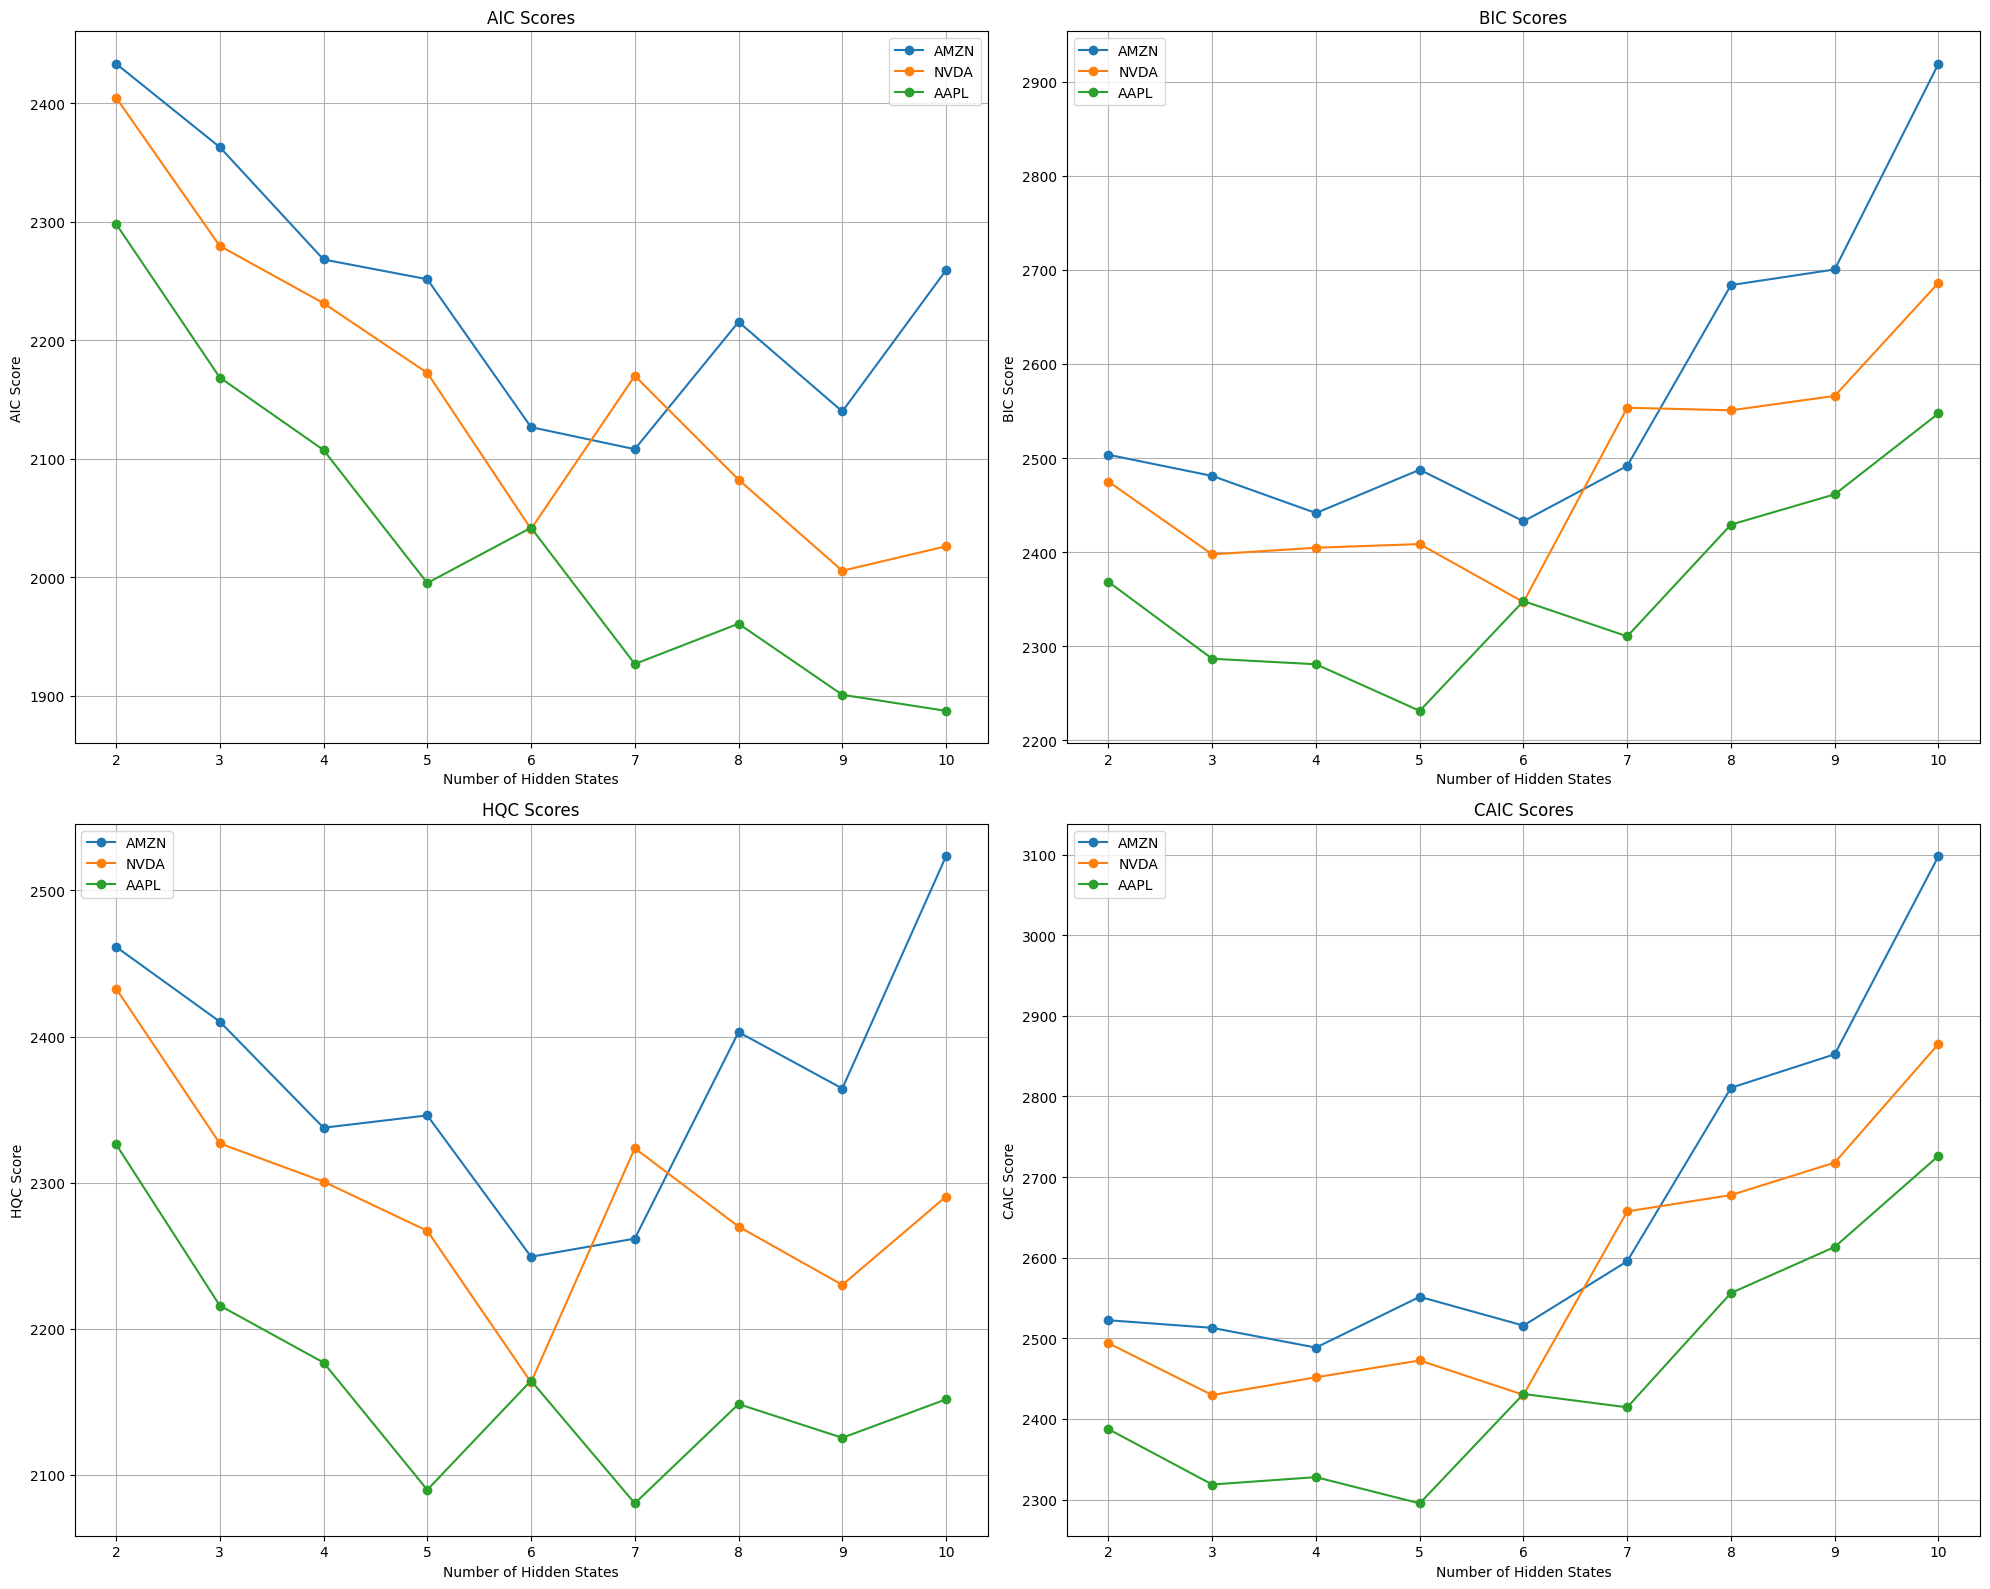

In [10]:
import numpy as np
import pandas as pd
from hmmlearn import hmm
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings

def clean_and_prepare_data(stock_data):
    # Extract OHLC prices
    data = stock_data[['Open', 'High', 'Low', 'Close']].values
    
    # Remove any rows with inf or NaN values
    data = data[np.isfinite(data).all(axis=1)]
    
    # Calculate returns for OHLC
    returns = np.diff(np.log(data), axis=0)
    
    # Remove any rows with inf or NaN values in returns
    returns = returns[np.isfinite(returns).all(axis=1)]
    
    # Standardize the returns
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(returns)
    
    # Ensure the data is 2D
    if scaled_data.ndim == 1:
        scaled_data = scaled_data.reshape(-1, 1)
    
    return scaled_data

def calculate_information_criteria(model, scaled_data):
    """Calculate AIC, BIC, HQC, and CAIC"""
    n_samples = len(scaled_data)
    n_parameters = model.n_components * model.n_components + 2 * model.n_components * model.n_features - 1
    logL = model.score(scaled_data)
    
    aic = -2 * logL + 2 * n_parameters
    bic = -2 * logL + n_parameters * np.log(n_samples)
    hqc = -2 * logL + 2 * n_parameters * np.log(np.log(n_samples))
    caic = -2 * logL + n_parameters * (np.log(n_samples) + 1)
    
    return aic, bic, hqc, caic

def find_optimal_hmm(stock_data, max_states=10):
    scaled_data = clean_and_prepare_data(stock_data)
    
    aic_scores, bic_scores, hqc_scores, caic_scores = [], [], [], []
    models = []

    for n_states in range(2, max_states + 1):
        try:
            model = hmm.GaussianHMM(n_components=n_states, covariance_type="full", n_iter=1000, random_state=42)
            model.fit(scaled_data)
            
            if not model.monitor_.converged:
                print(f"Model with {n_states} states did not converge")
                continue
            
            aic, bic, hqc, caic = calculate_information_criteria(model, scaled_data)
            
            if not all(np.isfinite([aic, bic, hqc, caic])):
                print(f"Invalid information criteria for {n_states} states")
                continue
            
            aic_scores.append(aic)
            bic_scores.append(bic)
            hqc_scores.append(hqc)
            caic_scores.append(caic)
            models.append(model)
            
            print(f"States: {n_states}, AIC: {aic}, BIC: {bic}, HQC: {hqc}, CAIC: {caic}")
        except Exception as e:
            print(f"Error fitting model with {n_states} states: {e}")

    if not models:
        raise ValueError("No valid models found")

    optimal_states = {
        'AIC': np.argmin(aic_scores) + 2,
        'BIC': np.argmin(bic_scores) + 2,
        'HQC': np.argmin(hqc_scores) + 2,
        'CAIC': np.argmin(caic_scores) + 2
    }
    
    return optimal_states, models, aic_scores, bic_scores, hqc_scores, caic_scores

# Initialize plots for all stocks
fig, axs = plt.subplots(2, 2, figsize=(20, 16))
axs = axs.ravel()

# Dictionary to store optimal states for each stock
optimal_states_dict = {}

# Find optimal HMM for each stock
for stock, data in stock_data.items():
    print(f"\nFinding optimal HMM for {stock}")
    try:
        optimal_states, models, aic_scores, bic_scores, hqc_scores, caic_scores = find_optimal_hmm(data)
        
        optimal_states_dict[stock] = optimal_states
        print(f"Optimal number of hidden states for {stock}:")
        for criterion, states in optimal_states.items():
            print(f"{criterion}: {states}")
        
        # Plot scores for this stock
        x = range(2, len(aic_scores) + 2)
        for ax, (criterion, scores) in zip(axs, [('AIC', aic_scores), ('BIC', bic_scores), 
                                                 ('HQC', hqc_scores), ('CAIC', caic_scores)]):
            ax.plot(x, scores, marker='o', label=stock)
            ax.set_title(f'{criterion} Scores')
            ax.set_xlabel('Number of Hidden States')
            ax.set_ylabel(f'{criterion} Score')
            ax.legend()
            ax.grid(True)
    except Exception as e:
        print(f"Error processing {stock}: {e}")
        print(f"Unable to determine optimal states for {stock}")

plt.tight_layout()

# Save each plot separately
plot_names = ['AIC_scores.png', 'BIC_scores.png', 'HQC_scores.png', 'CAIC_scores.png']
for ax, plot_name in zip(axs, plot_names):
    fig, temp_ax = plt.subplots(figsize=(10, 8))
    for line in ax.get_lines():
        temp_ax.plot(line.get_xdata(), line.get_ydata(), marker='o', label=line.get_label())
    temp_ax.set_title(ax.get_title())
    temp_ax.set_xlabel(ax.get_xlabel())
    temp_ax.set_ylabel(ax.get_ylabel())
    temp_ax.legend()
    temp_ax.grid(True)
    plt.savefig(plot_name, format='png')
    plt.close(fig)

# Print summary of optimal states
print("\nSummary of Optimal Hidden States:")
for stock, states in optimal_states_dict.items():
    print(f"{stock}:")
    for criterion, optimal_state in states.items():
        print(f"  {criterion}: {optimal_state}")

In [4]:
stocks = ['AMZN', 'NVDA', 'AAPL']

# Define the sizes of the training and prediction windows
d = 96  # Size of the prediction window: how far into the future predictions are made.
D = 96  # Size of the training window: how much past data is used to make predictions.

# Define the features to predict
features = ['Open', 'High', 'Low', 'Close']

# Process each stock
for stock in stocks:
    print(f"\nProcessing {stock}...")

    obs = stock_data[stock]  # Extract data for the specific stock
    data = obs[:162]  # Initial data subset (if required for your context)
    data = data[data.columns[1:5]]  # Use only specific columns for prediction
    obs = obs[obs.columns[1:5]]  # Ensure using specific columns across the entire dataset

    for feature in features:
        print(f"\nPredicting {feature} prices for {stock}...")

        T = data.shape[0]  # Total number of observations (rows) in the dataset.
        hmm_price = []  # List to store predicted prices.

        temp_T = T  # Store the initial total observations to control the prediction range.
        first_time = True  # Flag to indicate if the model is being trained for the first time.

        # Sliding window approach to predict future prices
        while T < temp_T + d:  # Loop until T has moved d steps beyond the initial data length
            
            # Extract training data from the past D observations
            train_data = obs.iloc[T-D:T]
            train_data = train_data.dropna()  # Remove any missing values from the training data.

            # Set the random seed for reproducibility
            np.random.seed(123)

            # Initialize and train the HMM model
            if first_time:
                first_time = False  # Only do this for the first iteration
                model = hmm.GaussianHMM(n_components=5)  # Create a new HMM with 5 hidden states
            else:
                old_model = model  # Save the current model
                # Create a new HMM model with initialized parameters from the old model
                model = hmm.GaussianHMM(n_components=5, init_params="c")
                model.startprob_ = old_model.startprob_  # Use previous starting probabilities
                model.transmat_ = old_model.transmat_    # Use previous transition matrix
                model.means_ = old_model.means_          # Use previous means

            model.fit(train_data)  # Fit the HMM model on the training data

            # Calculate the likelihood of the training data given the model
            original_likelihood = model.score(train_data)

            # Loop to find the most similar historical likelihood
            t = T  # Initialize t to the current time step
            min_diff = float('inf')  # Initialize minimum difference for likelihood comparison
            min_t = T  # Initialize min_t to the current time step
            min_likelihood = original_likelihood  # Initialize the minimum likelihood

            while t - D > 0:  # Continue while there are enough observations for training
                t = t - 1  # Move the window one step back

                # Recalculate the likelihood for this shifted window
                train_data = obs.iloc[t-D:t]
                new_likelihood = model.score(train_data)

                # Update the minimum difference and corresponding time if necessary
                if abs(new_likelihood - original_likelihood) < min_diff:
                    min_diff = abs(new_likelihood - original_likelihood)
                    min_t = t
                    min_likelihood = new_likelihood

            # Calculate the predicted price based on likelihood and past data
            close_price = obs[feature][T-1] + ((obs[feature][min_t + 1] - obs[feature][min_t]) * np.sign(original_likelihood - min_likelihood))

            # Append the predicted price to the list
            hmm_price.append(close_price)
            T = T + 1  # Move to the next time step

        print(f"HMM {feature} Prices for {stock}: ")
        print(hmm_price)

        # Plot the predicted and observed prices for comparison
        actual_prices = []  # List to store observed prices for plotting
        truncated_obs = obs.iloc[T-d:T]  # Slice the observed data for the plotting window

        # Collect the actual prices in the truncated observation window
        for i in truncated_obs[feature]:
            actual_prices.append(i)

        # Extract the corresponding dates for the plotting window
        # The first column is the date column
        dates = stock_data[stock].iloc[T-d:T, 0]

        # Calculate MAPE
        errors = [abs((c - p) / c) for c, p in zip(actual_prices, hmm_price) if c != 0]  # Avoid division by zero
        mape = sum(errors) / len(errors) * 100  # MAPE calculation
        print(f"MAPE for {feature} of {stock}: {mape:.2f}%")

        # Plot predicted and observed prices
        plt.figure(figsize=(14, 8))
        plt.plot(dates, hmm_price, marker='o', linestyle='-', linewidth=2, label=f"Predicted {feature}", color='blue')
        plt.plot(dates, actual_prices, marker='x', linestyle='--', linewidth=2, label=f"Observed {feature}", color='red')
        
        plt.title(f"{stock} - Predicted vs Observed {feature} Prices", fontsize=16)
        plt.ylabel(f"{feature} Price", fontsize=14)
        plt.xlabel("Date", fontsize=14)
        plt.xticks(rotation=45)
        plt.grid(True, linestyle='--', alpha=0.7)  # Add grid lines for better readability
        plt.legend(fontsize=12)
        plt.tight_layout()
        
        # Save the plot 
        filename = f"{stock}_{feature}_prices.png"
        plt.savefig(filename, format='png')
        print(f"Plot saved as {filename}")

        plt.close() 


Processing AMZN...

Predicting Open prices for AMZN...
HMM Open Prices for AMZN: 
[12.946000099182129, 14.310499668121338, 16.071500778198242, 13.723999977111816, 16.322500705718994, 19.136499881744385, 19.095000743865967, 19.7160005569458, 17.96099853515625, 18.590500354766846, 16.93899917602539, 14.783499717712402, 16.543500423431396, 16.901498794555664, 14.369998931884766, 18.313501358032227, 16.765498161315918, 13.718000411987305, 18.183000564575195, 14.314498901367188, 16.605499267578125, 18.604999542236328, 17.065000534057617, 19.597000122070312, 21.072500228881836, 24.55350112915039, 24.2864990234375, 24.512001037597656, 25.636499404907227, 32.109500885009766, 32.89750099182129, 36.72149848937988, 28.364999771118164, 27.84000015258789, 29.121999740600586, 33.08549976348877, 37.58099842071533, 35.353501319885254, 38.353999614715576, 38.394497871398926, 42.69700050354004, 39.07699966430664, 39.470497131347656, 40.02349853515625, 42.65250015258789, 44.400001525878906, 45.592002868

Model is not converging.  Current: 616.3826275590553 is not greater than 616.4053547555467. Delta is -0.02272719649135979
Model is not converging.  Current: 578.365618714963 is not greater than 578.4192503876642. Delta is -0.053631672701158095
Model is not converging.  Current: 540.1765521475904 is not greater than 540.1889871567013. Delta is -0.012435009110845385
Model is not converging.  Current: 558.2055285958791 is not greater than 558.2199740182368. Delta is -0.014445422357766802
Model is not converging.  Current: 554.6902538208499 is not greater than 554.6922869057557. Delta is -0.00203308490586096


HMM Open Prices for NVDA: 
[0.31974207094809187, 0.33816976449189756, 0.34691153658273777, 0.33874308016100635, 0.37361009845347476, 0.3663387887394716, 0.38900105092001236, 0.36528432646548337, 0.35431475878398083, 0.4338657876333587, 0.41924882996187846, 0.45313646951477277, 0.4452910997684279, 0.45927715515289597, 0.42521454537054715, 0.457380735958171, 0.44990921606768675, 0.4696667750748519, 0.5373165770709689, 0.4588364695416698, 0.47662541457993385, 0.5211794226465601, 0.524814367247491, 0.5207677206632986, 0.5576610007224538, 0.5071128331558621, 0.4795685641771491, 0.48683987389115224, 0.6678152486417058, 0.7845060123755417, 0.7407099791897452, 0.7140325080587735, 0.7700260641128834, 0.7140325080587735, 0.855992762849574, 1.1418316204536108, 1.0678906503637773, 0.8879274414967717, 1.40093706566614, 1.3348376440824092, 1.6143036088645772, 1.2448509014984208, 2.358137528659213, 2.5008242228209463, 2.733849849735793, 2.5846391431763336, 2.7898824730141083, 2.596651081352635, 3.561

Model is not converging.  Current: 616.3826275590553 is not greater than 616.4053547555467. Delta is -0.02272719649135979
Model is not converging.  Current: 578.365618714963 is not greater than 578.4192503876642. Delta is -0.053631672701158095
Model is not converging.  Current: 540.1765521475904 is not greater than 540.1889871567013. Delta is -0.012435009110845385
Model is not converging.  Current: 558.2055285958791 is not greater than 558.2199740182368. Delta is -0.014445422357766802
Model is not converging.  Current: 554.6902538208499 is not greater than 554.6922869057557. Delta is -0.00203308490586096


HMM High Prices for NVDA: 
[0.34960546400649317, 0.3594074522800233, 0.3776386561767091, 0.363169041541783, 0.3918643148318813, 0.3991355386941937, 0.40954734791149405, 0.3789321554487054, 0.4517345005506242, 0.4638561478630065, 0.46310541306398845, 0.4632822514531919, 0.4726582573803589, 0.4643385340635885, 0.48411462613048756, 0.4634287076317196, 0.4836543453611697, 0.49179295672039913, 0.549048270216441, 0.4837590985055802, 0.5432036504647155, 0.5609194779138867, 0.5482715776335576, 0.5534573379679406, 0.5450088638897976, 0.5204345100942472, 0.5870732334456843, 0.5798020095833719, 0.799336281760505, 0.8552982698779098, 0.7870834983893829, 0.7842313092585409, 0.8878323563183025, 0.7842313092585409, 0.6852451450559673, 1.1919252359467667, 1.16011958385196, 1.25233200599321, 1.5714774938046872, 1.6096290483945264, 1.242521024986, 1.7386749115327698, 3.0055468295391896, 2.2045969598135473, 2.993458829905211, 2.7141231592115833, 2.8477746875311745, 3.6332127432625576, 4.163166131717616, 

Model is not converging.  Current: 616.3826275590553 is not greater than 616.4053547555467. Delta is -0.02272719649135979
Model is not converging.  Current: 578.365618714963 is not greater than 578.4192503876642. Delta is -0.053631672701158095
Model is not converging.  Current: 540.1765521475904 is not greater than 540.1889871567013. Delta is -0.012435009110845385
Model is not converging.  Current: 558.2055285958791 is not greater than 558.2199740182368. Delta is -0.014445422357766802
Model is not converging.  Current: 554.6902538208499 is not greater than 554.6922869057557. Delta is -0.00203308490586096


HMM Low Prices for NVDA: 
[0.3139370278835076, 0.30596314894088794, 0.34409684674113233, 0.36393426940323975, 0.3488033113148255, 0.33754448466564296, 0.3857503805760535, 0.35667852139598555, 0.3535487510640864, 0.3961472211201636, 0.4158248356572882, 0.4296788685017203, 0.42303950443148997, 0.42230919188367005, 0.450798740972872, 0.397391916212181, 0.3978312825684979, 0.4830913987898421, 0.5208818251818624, 0.42335267549885686, 0.47392914031667793, 0.4828901258145116, 0.505349724726573, 0.48336275050549227, 0.4911910966436322, 0.4423094634678383, 0.4692867705913251, 0.48054559724050766, 0.6208955545929763, 0.7728370570958768, 0.7588606858640776, 0.6039748357750999, 0.7602293732704929, 0.6039748357750999, 0.853788649161548, 1.0944396417140314, 1.0529546953035624, 0.8977493062710731, 1.4975367676350286, 1.2531643530326142, 1.4962192799829814, 1.1873090498471321, 2.1969896317880906, 2.370983329192443, 2.3751023302136143, 2.349624054025418, 2.402898700829593, 2.543132035709791, 3.50162046

Model is not converging.  Current: 616.3826275590553 is not greater than 616.4053547555467. Delta is -0.02272719649135979
Model is not converging.  Current: 578.365618714963 is not greater than 578.4192503876642. Delta is -0.053631672701158095
Model is not converging.  Current: 540.1765521475904 is not greater than 540.1889871567013. Delta is -0.012435009110845385
Model is not converging.  Current: 558.2055285958791 is not greater than 558.2199740182368. Delta is -0.014445422357766802
Model is not converging.  Current: 554.6902538208499 is not greater than 554.6922869057557. Delta is -0.00203308490586096


HMM Close Prices for NVDA: 
[0.33770307898521423, 0.34597331285476685, 0.3649725317955017, 0.3560020327568054, 0.346958726644516, 0.35855716466903687, 0.39575833082199097, 0.37025073170661926, 0.44408854842185974, 0.4332464337348938, 0.4462204575538635, 0.44462379813194275, 0.4313182234764099, 0.40779411792755127, 0.4839265048503876, 0.42202436923980713, 0.45774343609809875, 0.4944114685058594, 0.5176011323928833, 0.48694872856140137, 0.5563369691371918, 0.5119031369686127, 0.5262816846370697, 0.5444203913211823, 0.4781612753868103, 0.49193695187568665, 0.5581031739711761, 0.5465047359466553, 0.7801305055618286, 0.8584328889846802, 0.8004500865936279, 0.7680666446685791, 0.872647225856781, 0.7680666446685791, 0.5931620597839355, 1.1543554067611694, 1.207657814025879, 1.2952299118041992, 1.5985707640647888, 1.6206989288330078, 1.229595422744751, 1.9133565425872803, 2.6600784063339233, 2.168937921524048, 2.4924323558807373, 2.6387075781822205, 2.7495795488357544, 3.589428633451462, 3.578

Model is not converging.  Current: -663.0384241065409 is not greater than -663.0372778753373. Delta is -0.0011462312036201183


Plot saved as NVDA_Close_prices.png

Processing AAPL...

Predicting Open prices for AAPL...
HMM Open Prices for AAPL: 
[12.405904845369779, 14.040556587083513, 15.291517673606826, 14.837212612527878, 13.424045393858375, 14.837212612527878, 18.559952269771554, 18.9881615570783, 17.33280187989609, 16.874239494419403, 18.57622165539316, 20.00398420619826, 21.431746757003364, 22.08428148696233, 19.533575223175397, 21.44916428576553, 20.900887061173623, 23.275513542331048, 25.332639662032463, 22.917625967043513, 26.622801951825046, 29.47690756561149, 28.485388166157968, 30.139192955995526, 28.628431678710314, 27.09353514327812, 25.605635846316552, 24.418753092357694, 22.96953430973673, 27.621264434321706, 29.57342167438699, 26.92512229609672, 21.419091135703272, 23.512055897899643, 23.163729501623337, 19.942173719583735, 23.52047460033242, 18.52500684126556, 21.33643377698084, 25.990774757603965, 24.475741302991345, 28.774365090433335, 27.216490151708072, 24.23751212908145, 30.0252217046690

Model is not converging.  Current: -663.0384241065409 is not greater than -663.0372778753373. Delta is -0.0011462312036201183


Plot saved as AAPL_Open_prices.png

Predicting High prices for AAPL...
HMM High Prices for AAPL: 
[14.089537948818311, 15.93158003652694, 15.75110189066907, 16.722677276891346, 16.02990216704555, 16.722677276891346, 18.46413775068124, 17.65191605152701, 17.473788199911457, 18.809367168756932, 20.32614950722817, 20.99446746478949, 21.66278542235081, 22.632438000837173, 22.17309762266901, 22.35955315999969, 23.314054893409143, 26.765702288555538, 26.061177065973496, 26.566268864931413, 30.779542613069776, 28.204662100360466, 29.158131908375154, 30.07201150552332, 28.56079103996066, 29.217240341669267, 26.03132244193987, 24.80799761834042, 27.18988990251227, 28.733255271709893, 27.76380142421461, 27.176794361658324, 23.51535463889529, 24.991770941045985, 23.779301895872678, 23.192697655152188, 22.759010199694483, 21.460898189658746, 26.16197290981432, 27.369749305971645, 26.79094313351517, 25.49211962659492, 29.197021744441336, 24.755300368421857, 30.883835523614056, 34.247892655137434, 3

Model is not converging.  Current: -663.0384241065409 is not greater than -663.0372778753373. Delta is -0.0011462312036201183


Plot saved as AAPL_High_prices.png

Predicting Low prices for AAPL...
HMM Low Prices for AAPL: 
[12.360617077883935, 13.963844362634637, 13.868733460399815, 14.83193860828949, 13.681696208950836, 14.83193860828949, 17.63035784282312, 15.215480303653958, 15.394838667733488, 16.04489981710229, 18.311744771599134, 19.642374506721247, 20.97300424184336, 21.777320163435153, 19.37536514714266, 20.010222188119847, 19.797123798210087, 23.080410030882682, 22.865444601897195, 22.691278368801928, 26.138096907040975, 27.436225977510038, 27.765240055399108, 28.245194067742876, 27.17307769604849, 25.464554748098465, 18.504123986721233, 24.59904916060351, 24.40689408435604, 26.56914642005144, 24.70702653186407, 23.766659361409907, 22.070777025777993, 22.11355045849505, 19.486112323220745, 20.90096922391302, 20.327839236153167, 21.0754958496359, 22.508702197601945, 25.89161726343037, 23.643276766606295, 25.468269618603625, 26.693690958561117, 23.760038745218495, 28.472178187788906, 32.561767598295674,

Model is not converging.  Current: -663.0384241065409 is not greater than -663.0372778753373. Delta is -0.0011462312036201183


Plot saved as AAPL_Low_prices.png

Predicting Close prices for AAPL...
HMM Close Prices for AAPL: 
[13.941353797912598, 15.109176635742188, 14.784492492675781, 16.209444046020508, 15.073928833007812, 16.209444046020508, 17.65377426147461, 14.716720581054688, 15.614742279052734, 18.51628875732422, 19.973691940307617, 20.526208877563477, 21.078725814819336, 21.668468475341797, 22.20010757446289, 21.8116397857666, 23.420976638793945, 26.18470001220703, 24.453636169433594, 26.508045196533203, 30.388486862182617, 26.240489959716797, 26.401634216308594, 28.892499923706055, 27.601163864135742, 26.710153579711914, 24.000587463378906, 23.228540420532227, 27.87771224975586, 29.77975082397461, 23.709821701049805, 23.866424560546875, 23.467195510864258, 24.521570205688477, 20.201916694641113, 24.628729820251465, 19.95167350769043, 25.43497657775879, 25.36850357055664, 26.18216896057129, 26.06917953491211, 24.714624404907227, 28.012877464294434, 24.364086151123047, 30.661117553710938, 35.4170246124